# Implement RC4

In [1]:
import numpy as np
import secrets
import matplotlib.pyplot as plt
plt.style.use('seaborn')

In [2]:
def xor_bytes(b1:bytes, b2:bytes) -> bytes:
    return bytes(byte1 ^ byte2 for byte1, byte2 in zip(b1, b2))

In [3]:
class RC4:
    def __init__(self, key:bytes) -> None:
        self.S = [i for i in range(256)]
        self.T = self.__repeat_string(key, 256)

        j = 0
        for i in range(256):
            j = (j + self.S[i] + self.T[i]) % 256
            self.S[i], self.S[j] = self.S[j], self.S[i]
    
    def __repeat_string(self, a_string:str, target_length:int) -> str:
        number_of_repeats = target_length // len(a_string) + 1
        a_string_repeated = a_string * number_of_repeats
        a_string_repeated_to_target = a_string_repeated[:target_length]
        return a_string_repeated_to_target
        
    def __gen_key(self, len_text:int) -> bytes:
        i, j = 0, 0
        key = []
        for _ in range(len_text):
            i = (i + 1) % 256
            j = (j + self.S[i]) % 256
            self.S[i], self.S[j] = self.S[j], self.S[i]
            t = (self.S[i] + self.S[j]) % 256
            key.append(self.S[t])
        return bytes(key)
        
    def encrypt(self, p_text:str) -> bytes:
        p_text = bytes(p_text, 'utf-8')
        key = self.__gen_key(len(p_text))
        cipher = xor_bytes(p_text, key)
        return cipher

    def decrypt(self, cipher:bytes) -> str:
        key = self.__gen_key(len(cipher))
        dec = xor_bytes(cipher, key)
        return dec.decode('utf-8')

In [4]:
key = "I am the key"

text = "Harry Potter is a series of seven fantasy novels written by British author J. K. Rowling. The novels chronicle the lives of a young wizard, Harry Potter, and his friends Hermione Granger and Ron Weasley, all of whom are students at Hogwarts School of Witchcraft and Wizardry. The main story arc concerns Harry's struggle against Lord Voldemort, a dark wizard who intends to become immortal, overthrow the wizard governing body known as the Ministry of Magic and subjugate all wizards and Muggles (non-magical people)."

text = "Moez Hadra, a defence lawyer for the deposed officials, said the four ministers are from among the 100 government officials and political leaders who were arrested during the coup. Half of them, he said, are believed to be held in Khartoum and the others are scattered across the country’s provinces. He said about 25 officials and politicians are facing charges for inciting troops to rebel. Many were taken from their homes in the early morning hours and have been kept in undisclosed locations. The military leaders also raided the state news television headquarters and cut off mobile and internet communications across the country. Tens of thousands of people came out to protest. Internet services were still restricted. Sara Abdelgalil, a spokeswoman for the Sudanese Professionals’ Association, the key force behind the 2019 uprising and anti-coup protests, estimated that hundreds of protesters and opposition figures have been rounded up in the past week. Some have disappeared and some have been interrogated and later released, she said. Ali Agab, a prominent Sudanese human rights lawyer, said he had heard reports of security forces identifying protesters from photos taken at demonstrations and forcibly detaining them from their homes. Abdelgalil said the near-blackout of communications has made it difficult to know just how many have gone missing, or are being held in secret prisons that were commonly used under longtime strongman Omar al-Bashir, who was toppled by the military following protests in 2019."

In [5]:
bkey = bytes(key, "utf-8")
sender_rc4 = RC4(bkey)
reciever_rc4 = RC4(bkey)

In [6]:
cipher = sender_rc4.encrypt(text)
dec = reciever_rc4.decrypt(cipher)

In [7]:
text

'Moez Hadra, a defence lawyer for the deposed officials, said the four ministers are from among the 100 government officials and political leaders who were arrested during the coup. Half of them, he said, are believed to be held in Khartoum and the others are scattered across the country’s provinces. He said about 25 officials and politicians are facing charges for inciting troops to rebel. Many were taken from their homes in the early morning hours and have been kept in undisclosed locations. The military leaders also raided the state news television headquarters and cut off mobile and internet communications across the country. Tens of thousands of people came out to protest. Internet services were still restricted. Sara Abdelgalil, a spokeswoman for the Sudanese Professionals’ Association, the key force behind the 2019 uprising and anti-coup protests, estimated that hundreds of protesters and opposition figures have been rounded up in the past week. Some have disappeared and some ha

In [8]:
cipher

b'+\xa9\xdf\x14\xa0HqM\x8do\x1b\x0cu\x16\n\xc28\x8b\xfc\xf4\xc7\x19MF\x9d\x96\xe1\x95Y3QLWi\x188\xa5\xb1vH\xb9\x99\xa9r\xbd\x9e&\xf4\xc7\xbf\xe8\x83z\xd5x\x80\xdf\xca\x9d?\xad\xb8u\x90\xff\x8c\xea\xce6\x00A\xabvw\x04E\xf8\xd2\x04\x16\xb8>\x12Z\xf1\xc1\xf0p3j\xb5\xb9\xa1i\xed\xfeB\xe8G\xe6F>\xe9\x7fg\x15\x9f\xaa\xb7\xa6\x87\xa6\xc9\x12\xa7\xfac\xa1\x17\x93\'6u|`[\xa5\xe9\x9f\xee7\xa4\x04\x98\xffq\xcf\xc1\xa3\xd5\n\xd1\xc3CmfMt\xa7\x1b5Y\xd5\xbc\x9b\x1b\xc9\x8c\x99\xd7\x1d\x7f1\xadJ&\xcf\xcc\xf5\xe7\xcb\xb4e\xdaL\x1fae\xdf\x9b\xfd-`\x14\xcb,\x18=\xbd\xe8=r\xce\x9bG\xac=\x97d\xd5a\xd6\xad\x02ZB\xcf\xffL\x15\xd9\xf5\xd7 B\xbfs\x86_\xc4\xc5\xfb[\xac\xefD:\x98\x18\xbe\xad<\x93\xc6i\x8a\xc98i\xd3\xc1s\x9db\xce\xe0)]\xf4Nwb\x1a\x88UA \xbaKA\xb3S\xe5\r\xceI\x94d\x9e\xb1\xf8ONz\xaek\xdb\xfb\xf7pV+\x9a\x84\x86w.\xb1\x85D\xfd\xe3n\x16\xc3I\xe1}f$Z\x99\xda<\x18\xeeD\x99\xea\x99\xc7\xa3Y\xf2K\xd6\x19h\x12q\xf9\x1e\xfb\xbc\xf80\xf3Xm\x1d\xb7_\xff\xaa\xf37\x0c\xb4-\xa7\xc3\xc0{\xd1\xcf\xef\x83\x11\xf5

In [9]:
dec

'Moez Hadra, a defence lawyer for the deposed officials, said the four ministers are from among the 100 government officials and political leaders who were arrested during the coup. Half of them, he said, are believed to be held in Khartoum and the others are scattered across the country’s provinces. He said about 25 officials and politicians are facing charges for inciting troops to rebel. Many were taken from their homes in the early morning hours and have been kept in undisclosed locations. The military leaders also raided the state news television headquarters and cut off mobile and internet communications across the country. Tens of thousands of people came out to protest. Internet services were still restricted. Sara Abdelgalil, a spokeswoman for the Sudanese Professionals’ Association, the key force behind the 2019 uprising and anti-coup protests, estimated that hundreds of protesters and opposition figures have been rounded up in the past week. Some have disappeared and some ha

# Generate two outputs and XOR them

In [10]:
import secrets
import random
random.seed(7)

In [11]:
def toggle_bit(value, bit_index):
    return value ^ (1 << bit_index)

In [12]:
def random_flip(byte_str:bytes, bits_to_flip:int) -> bytes:
    byte_arr = bytearray(byte_str)
    for i in range(bits_to_flip):
        random_byte = random.randint(0,len(byte_arr)-1)
        random_bit = random.randint(0,7)
        byte_arr[random_byte] = toggle_bit(byte_arr[random_byte], random_bit)

    return bytes(byte_arr)

In [13]:
k1 = secrets.token_bytes(nbytes=256)
k2 = random_flip(k1, 1)

In [14]:
k1 == k2

False

In [15]:
sender_rc4 = RC4(k1)
reciever_rc4 = RC4(k2)

In [16]:
c1 = sender_rc4.encrypt(text)
c2 = reciever_rc4.encrypt(text)

In [17]:
c1 == c2

False

In [18]:
xor_bytes(c1, c2)

b'}\x00\xa2\xfa0\xe0o\x05t\x95\x8b?\xad4\xb3\xc8\x1a\xa8\x81\x8cS\xb0\xfak\xa0\x99\x11\xc7\x94\xf4~\x8b\xaf\x90\x18\x8c\xc5\xc9C\x80CW&\x0f8\xb9\xa0o\x80\x96\'\x8c\xc4y\xbb\xa1\xe5\x84\xca\x87\xebm\xda\xc1\xc7\xbbk\xbf<Ggi\x01o?\x8d\xa3\xc1\xe0hZ\x1dbb\xa6\x0f\xccf\xc8\x87\x87\xb7\xf9\xfb\xa4v\x8b\xb3?E\xa4\xeeVa\x8c\xfd`\xdc \x00\xa0\x159c\xae\x15\xb0\xa4\xf6J\xc7\xcb\xae\x90S0b\x937\t\xf6)\xa6n$1A\xf8\xf2\xfau\x00p\xdd\x98\xff\xc1\xcd\x19t\xd6Y\xd7\x859\x84\xd6\x1bw9\x19\xba\xed\x05\x17\r\xc5\x92\xa3\xe1q=5@\xd9\xb7E\xc0\xeao\xf7\xf8I\xee\xa6\xc1\x06\xd7\x08\x93\r\x93\xfb\xf6\x11\x9eT\xfaw\xe0)\xc5\xc0\xf3\xb3\xaa\x84 P/\xc3\x90\x9dW\xc2\xa5\xe9\xbc\x840\x1d\x0bNKyktX\xb7\x84\xfb\xff\x1bb!\x00\xb5\xd2\r\x01\xec\xefq\x14\xcd\xd2\x88_\xd6<\xfflM2\xd66\xab\x02\x97Y,\x04\xa8\xb3\xf7\xa2S;\xf1\x80\xbb\x94,\xd04\xf7\xce\xc1N\'\xa9\t\xc0\x1b\xf3\xf2/\xb7\x11\xda\xb5\x13\x82\x16\xbdQI\xd0\xae\x00\xd9\xf4\te\r\xacx\xf2Od\n\xaf\xc5<^\xb7H\x8f7\xf4\xd8u\x1fD\x87\x0erG\x07fd\x9fI\x8e\xfb\xfb\xca

# Analyze randomness

In [19]:
def count(text:bytes, size:int):
    total_counters = int(2**size)
    counters = [0 for i in range(total_counters)]
    bit_array = "".join(["{:b}".format(i) for i in text])

    for i in range(len(bit_array) - size):
        counters[int(bit_array[i : i+size], 2)] += 1
        
    return counters

In [20]:
counters = count(xor_bytes(c1, c2), 8)

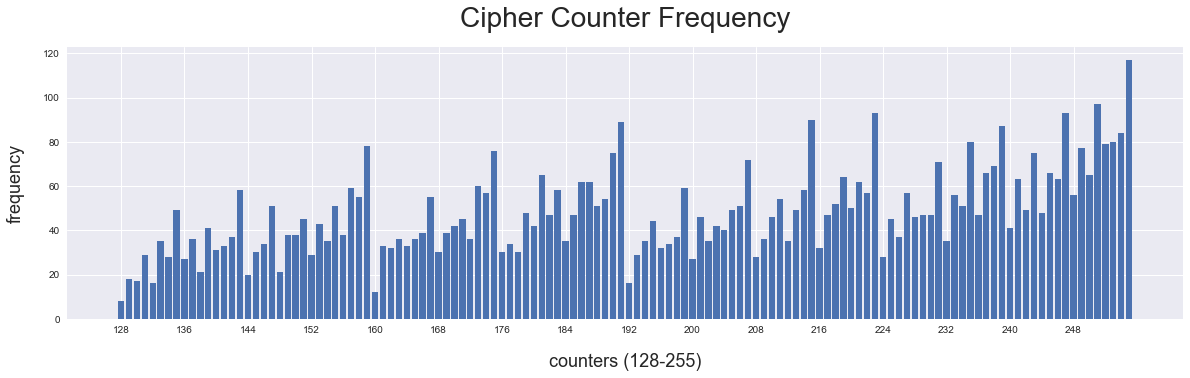

In [21]:
plt.figure(figsize=(20,5))
plt.bar(x=[i for i in range(128,256)], height=counters[128:])
plt.xticks([i for i in range(128, 256, 8)])
plt.title("Cipher Counter Frequency", fontsize=28, pad=20)
plt.xlabel("counters (128-255)", fontsize=18, labelpad=18)
plt.ylabel("frequency", fontsize=18, labelpad=18)
plt.show()

In [22]:
def randomness(text:bytes, counter_size:int):
    counters = count(text, counter_size)
    C = len(counters)
    N = len(text)
    D = np.std(counters)
    # print("Text:", N)
    # print("Counters:", C)
    # print("Deviation:", D)

    return (C*D)/N


In [24]:
randomness(xor_bytes(c1, c2), 8)

3.129582372526405

# Run randomness test lots of times

In [25]:
indices = [2**j for j in range(1, 11)]
indices

[2, 4, 8, 16, 32, 64, 128, 256, 512, 1024]

In [26]:
def rc4_analysis(key_size:int, counter_size:int, text:bytes):
    indices = [2**j for j in range(1, 11)]
    k1 = secrets.token_bytes(key_size)

    r_dict = dict()
    for idx in indices:
        subtext = text[:idx]
        s1_rc4 = RC4(k1)
        c1 = s1_rc4.encrypt(subtext)

        r = []
        for i in range(1,33):
            temp = []
            for _ in range(20):
                k2 = random_flip(k1, i)
                s2_rc4 = RC4(k2)
                c2 = s2_rc4.encrypt(subtext)
                # if i == 0:
                #     print(f"idx: {idx} | key: {k1 == k2} | cipher, {c1 == c2}\n")
                mix = xor_bytes(c1, c2)
                
                temp.append(randomness(mix, counter_size))

            r.append(np.mean(temp))
            
        r_dict[idx] = r
    return r_dict

In [27]:
r_dict = rc4_analysis(key_size=256, counter_size=8, text=text)

In [28]:
def plot_dict(r_dict:dict):
    indices = [2**j for j in range(1, 11)]
    fig = plt.figure(figsize=(20,20))
    for i, idx in enumerate(indices):
        plt.subplot(5,2,i+1)
        plt.plot(range(1,33), np.round(r_dict[idx], 2), label=idx, color='teal', marker="o")
        plt.xticks(range(1,33))
        plt.ylim(0,25)
        plt.title(f"Input size: {idx}", fontsize=18)
        plt.xlabel("Bit changes in the key (1-32)", fontsize=14, labelpad=10)
        plt.ylabel("Randomness", fontsize=14, labelpad=10)
    fig.tight_layout(pad=5)
    plt.show()

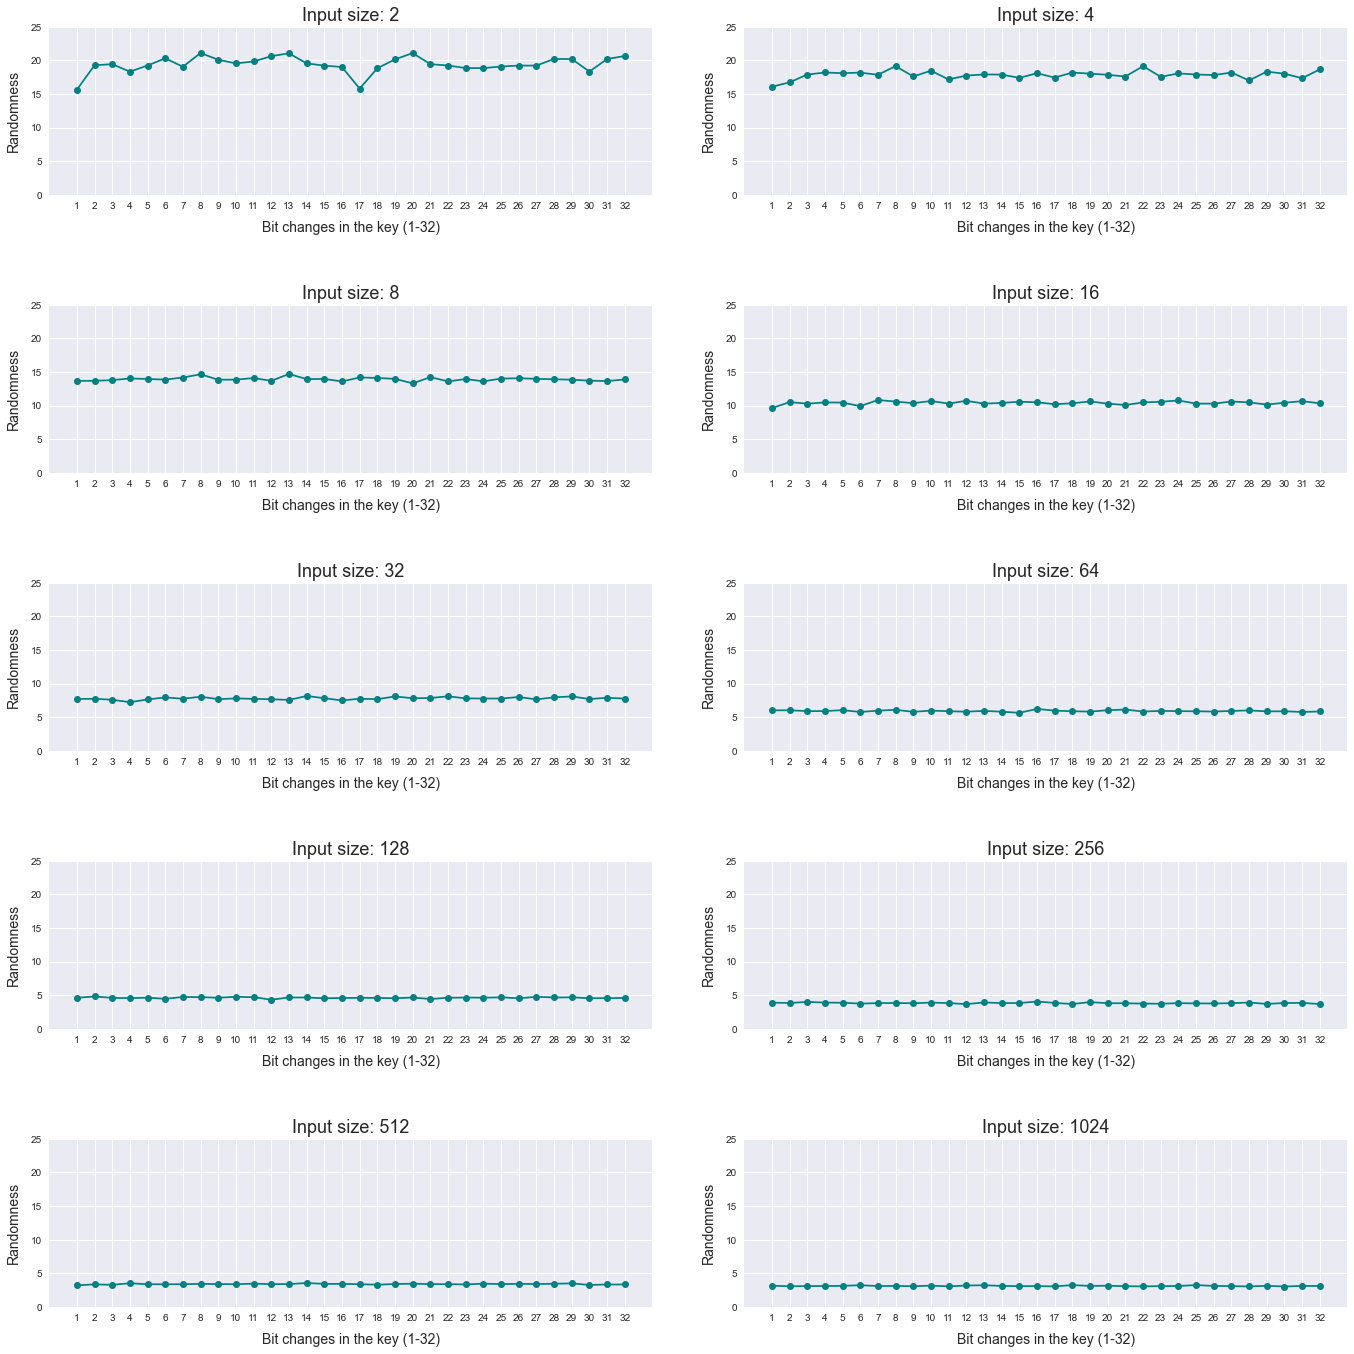

In [29]:
plot_dict(r_dict)

In [30]:
def plot_size_vs_randomness(r_dict:dict):
    indices = [2**j for j in range(1, 11)]
    fig = plt.figure(figsize=(10,8))

    y_values = []
    for idx in indices:
        y_values.append(np.round(np.mean(r_dict[idx])))

    for i, idx in enumerate(indices):
        plt.plot(range(len(indices)), y_values, color='teal', marker='o')

    plt.xticks(range(10), labels=indices)
    # plt.ylim(0,15)
    plt.title(f"Input size vs Randomness", fontsize=18)
    plt.xlabel("Input size (2-1024)", fontsize=14, labelpad=10)
    plt.ylabel("Randomness", fontsize=14, labelpad=10)
    fig.tight_layout(pad=5)
    plt.show()

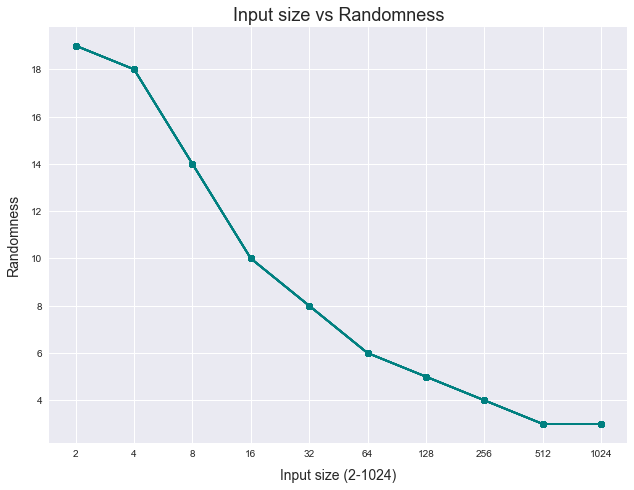

In [31]:
plot_size_vs_randomness(r_dict)